In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [126]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [127]:
train_df=pd.read_csv("D:\\machine learning projecsts folders\\realstate\\outliers\\gurgoan clean outliers data.csv")

In [128]:
train_df.sample(4)

,property_type,society,sector,price,rate,area,areaWithType,bedRoom,bathroom,balcony,noOfFloor,facing,agePossession,super_built_up_area,built_up_area,Carpet area,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score,area ratio
1700,Flat,signature global orchard avenue,sector 93,0.40,5479.0,730.0,Built Up area: 730 (67.82 sq.m.),2.0,2.0,No,0.0,NaN,Undefined,NaN,730.0,NaN,0,0,0,0,0,0,0,365.000000
2127,House,NaN,sector 56,3.25,21495.0,1512.0,Plot area 168(140.47 sq.m.),5.0,6.0,3+,4.0,East,Relatively New,NaN,1512.0,NaN,1,1,0,0,0,2,27,302.400000
665,House,NaN,sector 28,1.39,11583.0,1200.0,Plot area 540(50.17 sq.m.)Built Up area: 1450 ...,2.0,2.0,1,3.0,North-East,Old Property,NaN,1450.0,1200.0,0,0,0,1,0,0,37,600.000000
2214,Flat,m3m latitude,sector 65,4.70,19748.0,2380.0,Super Built up area 2380(221.11 sq.m.)Carpet a...,3.0,3.0,3+,9.0,North-East,Relatively New,2380.0,NaN,1231.0,0,1,1,0,0,2,44,793.333333


In [129]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3555 entries, 0 to 3554
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3555 non-null   object 
 1   society              3132 non-null   object 
 2   sector               3555 non-null   object 
 3   price                3555 non-null   float64
 4   rate                 3555 non-null   float64
 5   area                 3555 non-null   float64
 6   areaWithType         3555 non-null   object 
 7   bedRoom              3555 non-null   float64
 8   bathroom             3555 non-null   float64
 9   balcony              3555 non-null   object 
 10  noOfFloor            3538 non-null   float64
 11  facing               2544 non-null   object 
 12  agePossession        3555 non-null   object 
 13  super_built_up_area  1875 non-null   float64
 14  built_up_area        1587 non-null   float64
 15  Carpet area          1840 non-null   f

In [130]:
train_df.isnull().sum()

property_type             0
society                 423
sector                    0
price                     0
rate                      0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
noOfFloor                17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1968
Carpet area            1715
others                    0
pooja room                0
servant room              0
store room                0
study room                0
furnishing_type           0
luxury_score              0
area ratio                0
dtype: int64

# built up area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

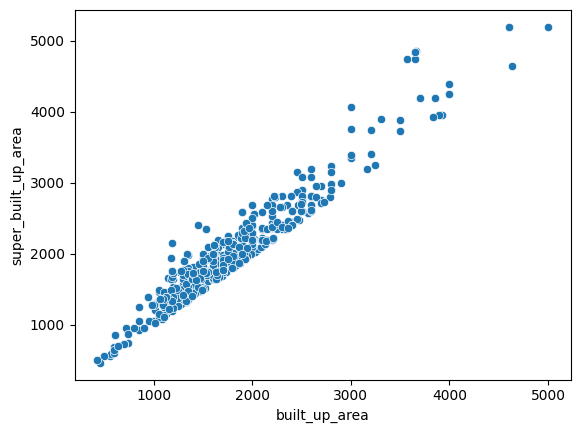

In [131]:
sns.scatterplot(x=train_df['built_up_area'],y=train_df['super_built_up_area'])

<Axes: xlabel='built_up_area', ylabel='Carpet area'>

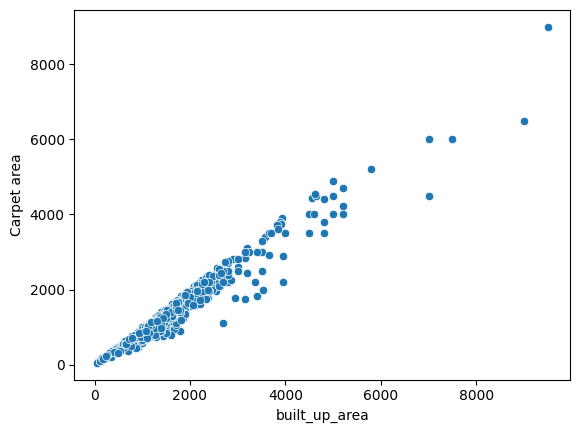

In [132]:
sns.scatterplot(x=train_df['built_up_area'],y=train_df['Carpet area'])

In [133]:
train_df[train_df['super_built_up_area'].isnull()&train_df['built_up_area'].isnull()&train_df['Carpet area'].isnull()]

,property_type,society,sector,price,rate,area,areaWithType,bedRoom,bathroom,balcony,noOfFloor,facing,agePossession,super_built_up_area,built_up_area,Carpet area,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score,area ratio


In [134]:
all_bup=train_df[~(train_df['super_built_up_area'].isnull()|train_df['built_up_area'].isnull()|train_df['Carpet area'].isnull())]

In [135]:
super_up_ratio=(all_bup['super_built_up_area']/all_bup['built_up_area']).median()
carpet_up_ratio=(all_bup['Carpet area']/all_bup['built_up_area']).median()

In [136]:
print(super_up_ratio,carpet_up_ratio)

1.105263157894737 0.9


In [137]:
saca=train_df[~(train_df['super_built_up_area'].isnull())&(train_df['built_up_area'].isnull())&~(train_df['Carpet area'].isnull())]

In [138]:
saca

,property_type,society,sector,price,rate,area,areaWithType,bedRoom,bathroom,balcony,noOfFloor,facing,agePossession,super_built_up_area,built_up_area,Carpet area,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score,area ratio
7,Flat,pareena coban residences,sector 99a,1.32,6610.0,1997.0,Super Built up area 1997(185.53 sq.m.)Carpet a...,3.0,5.0,3,11.0,North-East,New Property,1997.00,NaN,1500.00,0,0,1,0,0,0,88,665.666667
14,Flat,shapoorji pallonji joyville gurugram,sector 102,2.04,14069.0,1450.0,Super Built up area 1852(172.06 sq.m.)Carpet a...,3.0,3.0,3+,1.0,South,Relatively New,1852.00,NaN,1450.00,0,0,0,0,0,0,72,483.333333
22,Flat,puri the aravallis,sector 61,3.87,17200.0,2250.0,Super Built up area 2250(209.03 sq.m.)Carpet a...,3.0,4.0,3+,21.0,East,Under Construction,2250.00,NaN,1249.65,0,0,1,0,0,0,58,750.000000
25,Flat,imperia the esfera,sector 37c,0.98,5399.0,1815.0,Super Built up area 1815(168.62 sq.m.)Carpet a...,3.0,4.0,3,9.0,South-West,Relatively New,1815.00,NaN,1510.00,1,0,1,0,0,0,49,605.000000
34,Flat,ashiana anmol,sohna road,0.99,8216.0,1205.0,Super Built up area 1205(111.95 sq.m.)Carpet a...,2.0,2.0,2,6.0,East,Under Construction,1205.00,NaN,900.00,0,0,0,0,0,0,49,602.500000
44,Flat,emaar mgf palm hills,sector 77,1.90,9500.0,2000.0,Super Built up area 2000(185.81 sq.m.)Carpet a...,3.0,4.0,3+,6.0,South-West,New Property,2000.00,NaN,1218.03,0,0,1,0,0,2,42,666.666667
48,Flat,breez global hill view,sohna road,0.30,5405.0,555.0,Super Built up area 655(60.85 sq.m.)Carpet are...,2.0,2.0,2,6.0,North-East,New Property,655.00,NaN,555.00,0,0,0,0,0,0,109,277.500000
54,Flat,housing board colony,sector 51,0.30,7317.0,410.0,Super Built up area 510(47.38 sq.m.)Carpet are...,1.0,1.0,2,0.0,South,Old Property,510.00,NaN,410.00,0,0,0,0,0,0,0,410.000000
98,Flat,dlf new town heights,sector 86,1.28,8205.0,1560.0,Super Built up area 1930(179.3 sq.m.)Carpet ar...,3.0,4.0,3+,12.0,West,Moderately Old,1930.00,NaN,1560.00,0,1,1,0,0,0,96,520.000000
103,Flat,shapoorji pallonji joyville gurugram,sector 102,0.97,16441.0,590.0,Super Built up area 915(85.01 sq.m.)Carpet are...,2.0,2.0,2,10.0,North-East,Relatively New,915.00,NaN,589.49,0,0,0,0,0,0,151,295.000000


In [139]:
saca['built_up_area']=saca['built_up_area'].fillna(round(saca['super_built_up_area']/super_up_ratio)+(saca['Carpet area']/carpet_up_ratio))

C:\Users\karan\AppData\Local\Temp\ipykernel_18492\965376430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saca['built_up_area']=saca['built_up_area'].fillna(round(saca['super_built_up_area']/super_up_ratio)+(saca['Carpet area']/carpet_up_ratio))


In [140]:
train_df.update(saca)

In [141]:
train_df.isnull().sum()

property_type             0
society                 423
sector                    0
price                     0
rate                      0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
noOfFloor                17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1547
Carpet area            1715
others                    0
pooja room                0
servant room              0
store room                0
study room                0
furnishing_type           0
luxury_score              0
area ratio                0
dtype: int64

In [142]:
# data were only super up is avalble and rest are null
sbua=train_df[~(train_df['super_built_up_area'].isnull())&(train_df['built_up_area'].isnull())&(train_df['Carpet area'].isnull())]

In [143]:
sbua['built_up_area']=sbua['built_up_area'].fillna(round(sbua['super_built_up_area']/super_up_ratio))

C:\Users\karan\AppData\Local\Temp\ipykernel_18492\157362937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbua['built_up_area']=sbua['built_up_area'].fillna(round(sbua['super_built_up_area']/super_up_ratio))


In [144]:
train_df.update(sbua)

In [145]:
train_df.isnull().sum()

property_type             0
society                 423
sector                    0
price                     0
rate                      0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
noOfFloor                17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area           672
Carpet area            1715
others                    0
pooja room                0
servant room              0
store room                0
study room                0
furnishing_type           0
luxury_score              0
area ratio                0
dtype: int64

In [146]:
# data were only super up is avalble and rest are null
bua=train_df[(train_df['super_built_up_area'].isnull())&(train_df['built_up_area'].isnull())&~(train_df['Carpet area'].isnull())]

In [147]:
bua['built_up_area']=bua['built_up_area'].fillna(round(train_df['Carpet area']/carpet_up_ratio))

C:\Users\karan\AppData\Local\Temp\ipykernel_18492\1647113612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bua['built_up_area']=bua['built_up_area'].fillna(round(train_df['Carpet area']/carpet_up_ratio))


In [148]:
train_df.update(bua)

In [149]:
train_df.isnull().sum()

property_type             0
society                 423
sector                    0
price                     0
rate                      0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
noOfFloor                17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area             0
Carpet area            1715
others                    0
pooja room                0
servant room              0
store room                0
study room                0
furnishing_type           0
luxury_score              0
area ratio                0
dtype: int64

after impouting there is no null value in the data for built up are which is the required column

<Axes: xlabel='built_up_area', ylabel='price'>

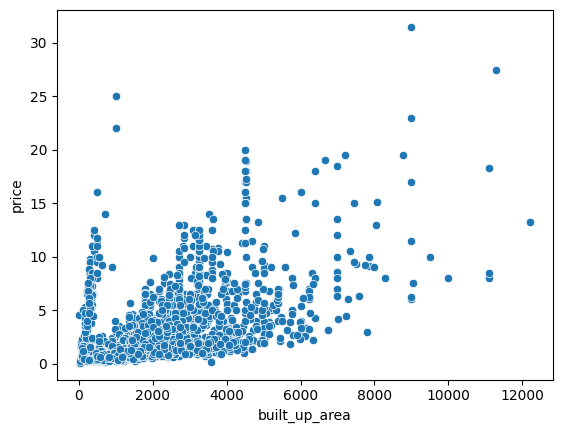

In [150]:
sns.scatterplot(y=train_df['price'],x=train_df['built_up_area'])

In [151]:
anamoly_df = train_df[(train_df['built_up_area'] < 2000) & (train_df['price'] > 2.5)][['price','area','built_up_area']]

In [152]:
anamoly_df

,price,area,built_up_area
26,3.50,1440.0,178.00
28,4.86,1875.0,1696.00
32,4.35,1350.0,1350.00
42,5.75,2329.0,1900.00
69,2.90,1557.0,1415.00
82,2.80,1800.0,1900.00
124,2.90,2003.0,1812.00
166,2.60,1711.0,1548.00
176,2.78,2047.0,1852.00
182,2.51,1696.0,1534.00


In [153]:
anamoly_df['built_up_area']=anamoly_df['area']

In [154]:
train_df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

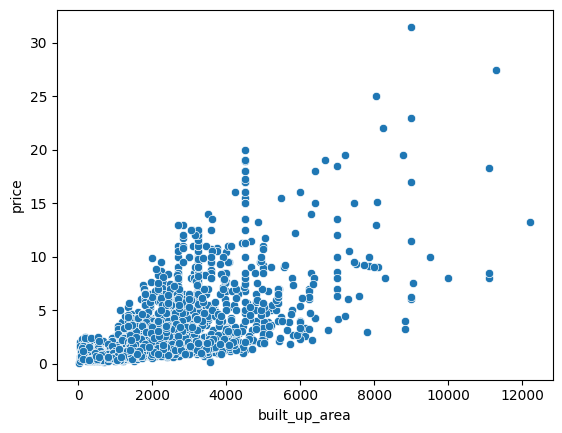

In [155]:
sns.scatterplot(x=train_df['built_up_area'],y=train_df['price'])

# facing

In [156]:
train_df[train_df['facing'].isnull()]

,property_type,society,sector,price,rate,area,areaWithType,bedRoom,bathroom,balcony,noOfFloor,facing,agePossession,super_built_up_area,built_up_area,Carpet area,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score,area ratio
0,Flat,tulip violet,sector 69,2.00,10168.0,1967.0,Carpet area: 1967 (182.74 sq.m.),4.0,4.0,1,12.0,NaN,Relatively New,NaN,2186.000000,1967.000000,0,0,0,0,0,0,79,491.750000
1,Flat,ss the leaf,sector 85,1.30,7927.0,1640.0,Super Built up area 1640(152.36 sq.m.),2.0,2.0,2,17.0,NaN,New Property,1640.00,1484.000000,NaN,0,0,0,0,0,0,90,820.000000
2,Flat,tulsiani easy in homes,sohna road,0.40,7921.0,505.0,Carpet area: 505 (46.92 sq.m.),2.0,2.0,3,9.0,NaN,Under Construction,NaN,561.000000,505.000000,0,0,0,0,0,0,36,252.500000
5,Flat,ss the leaf,sector 85,2.70,7754.0,3482.0,Super Built up area 3482(323.49 sq.m.),4.0,4.0,3+,23.0,NaN,New Property,3482.00,3150.000000,NaN,0,0,0,0,0,0,21,870.500000
10,Flat,vipul world,sector 48,1.38,9485.0,1455.0,Carpet area: 1450 (134.71 sq.m.),3.0,3.0,1,2.0,NaN,Relatively New,NaN,1611.000000,1450.000000,0,0,0,0,0,0,60,485.000000
11,Flat,ss residency,sector 12,0.53,4818.0,1100.0,Super Built up area 1100(102.19 sq.m.),3.0,3.0,2,2.0,NaN,Relatively New,1100.00,995.000000,NaN,0,0,0,0,0,2,14,366.666667
16,Flat,raheja vedaanta,sector 108,1.25,5682.0,2200.0,Super Built up area 2200(204.39 sq.m.),3.0,2.0,No,0.0,NaN,Relatively New,2200.00,1990.000000,NaN,0,0,0,0,0,2,65,733.333333
35,Flat,sahara grace,sector 28,4.30,12421.0,3462.0,Super Built up area 3462.01(321.63 sq.m.),3.0,4.0,3,5.0,NaN,Old Property,3462.01,3132.000000,NaN,0,0,1,1,0,0,24,1154.000000
39,Flat,signature global park,sohna road,0.68,8252.0,824.0,Carpet area: 824 (76.55 sq.m.),2.0,2.0,2,3.0,NaN,New Property,NaN,916.000000,824.000000,0,0,0,0,0,0,113,412.000000
46,Flat,godrej air,sector 85,1.75,9589.0,1825.0,Built Up area: 1825 (169.55 sq.m.),3.0,3.0,2,27.0,NaN,Undefined,NaN,1825.000000,NaN,0,0,0,0,0,0,44,608.333333


as the facing column have a large number of nan data we area not going to use this perticular column in our dataset

In [157]:
train_df.drop(columns=['facing','society','super_built_up_area','Carpet area','area','areaWithType'],inplace=True)

In [158]:
train_df.sample()

,property_type,sector,price,rate,bedRoom,bathroom,balcony,noOfFloor,agePossession,built_up_area,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score,area ratio
2788,House,sector 31,4.6,32258.0,2.0,2.0,2,2.0,Undefined,1426.0,0,0,0,0,0,0,0,713.0


In [159]:
train_df.isnull().sum()

property_type       0
sector              0
price               0
rate                0
bedRoom             0
bathroom            0
balcony             0
noOfFloor          17
agePossession       0
built_up_area       0
others              0
pooja room          0
servant room        0
store room          0
study room          0
furnishing_type     0
luxury_score        0
area ratio          0
dtype: int64

In [160]:
train_df[train_df['noOfFloor'].isnull()][['property_type','price','noOfFloor']]

,property_type,price,noOfFloor
72,House,1.50,NaN
357,House,13.00,NaN
538,House,2.47,NaN
571,House,1.45,NaN
778,House,10.50,NaN
1127,House,0.35,NaN
1193,House,8.50,NaN
2059,House,6.50,NaN
2092,House,0.65,NaN
2308,Flat,1.08,NaN


In [161]:
a=train_df[train_df['property_type']=='House']['noOfFloor'].median()

In [162]:
train_df['noOfFloor'].fillna(a,inplace=True)

C:\Users\karan\AppData\Local\Temp\ipykernel_18492\180624299.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['noOfFloor'].fillna(a,inplace=True)


In [163]:
train_df['noOfFloor'][72]

np.float64(2.0)

In [164]:
train_df['agePossession'].value_counts()

agePossession
Relatively New        1605
New Property           557
Moderately Old         545
Old Property           293
Undefined              291
Under Construction     264
Name: count, dtype: int64

In [165]:
train_df[train_df['agePossession']=='Undefined'][['property_type','agePossession','price','sector']]

,property_type,agePossession,price,sector
18,House,Undefined,2.25,sector 13
29,Flat,Undefined,5.00,sector 52
46,Flat,Undefined,1.75,sector 85
49,Flat,Undefined,1.71,sector 89
52,Flat,Undefined,0.21,sohna road
57,Flat,Undefined,2.00,sector 65
61,House,Undefined,0.80,sector 69
71,House,Undefined,0.45,sector 7
74,Flat,Undefined,1.25,sector 79
88,Flat,Undefined,1.20,sector 67


replacing the value of undefine into mode after checking the value of sector and property type togther

In [166]:
def mode_based_imputation(row):
    if(row['agePossession']=='Undefined'):
       mode_value=train_df[(train_df['sector']==row['sector'])&(train_df['property_type']==row['property_type'])]['agePossession'].mode()
       if not mode_value.empty:
           return mode_value.iloc[0]
       else:
           return np.nan
    else:
        return row['agePossession']

In [167]:
train_df['agePossession'] = train_df.apply(mode_based_imputation,axis=1)

In [168]:
train_df['agePossession'].value_counts()

agePossession
Relatively New        1717
New Property           597
Moderately Old         584
Old Property           326
Under Construction     278
Undefined               53
Name: count, dtype: int64

replcing with only sector value same 

In [169]:
def mode_based_imputation2(row):
    if(row['agePossession']=='Undefined'):
        model_value=train_df[(train_df['sector']==row['sector'])]['agePossession'].mode()
        if not model_value.empty:
            return model_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [170]:
train_df['agePossession']=train_df.apply(mode_based_imputation2,axis=1)

In [171]:
train_df['agePossession'].value_counts()

agePossession
Relatively New        1726
New Property           598
Moderately Old         591
Old Property           329
Under Construction     278
Undefined               33
Name: count, dtype: int64

there are still undefine value left now we will check on the basis of property tupe

In [172]:
def mode_based_imputation3(row):
    if(row['agePossession']=='Undefined'):
       mode_value=train_df[(train_df['property_type']==row['property_type'])]['agePossession'].mode()
       if not mode_value.empty:
           return mode_value.iloc[0]
       else:
           return np.nan
    else:
        return row['agePossession']

In [173]:
train_df['agePossession']=train_df.apply(mode_based_imputation3,axis=1)

In [174]:
train_df['agePossession'].value_counts()

agePossession
Relatively New        1728
Moderately Old         622
New Property           598
Old Property           329
Under Construction     278
Name: count, dtype: int64

In [175]:
train_df.isnull().sum()

property_type      0
sector             0
price              0
rate               0
bedRoom            0
bathroom           0
balcony            0
noOfFloor          0
agePossession      0
built_up_area      0
others             0
pooja room         0
servant room       0
store room         0
study room         0
furnishing_type    0
luxury_score       0
area ratio         0
dtype: int64

In [176]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3555 entries, 0 to 3554
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3555 non-null   object 
 1   sector           3555 non-null   object 
 2   price            3555 non-null   float64
 3   rate             3555 non-null   float64
 4   bedRoom          3555 non-null   float64
 5   bathroom         3555 non-null   float64
 6   balcony          3555 non-null   object 
 7   noOfFloor        3555 non-null   float64
 8   agePossession    3555 non-null   object 
 9   built_up_area    3555 non-null   float64
 10  others           3555 non-null   int64  
 11  pooja room       3555 non-null   int64  
 12  servant room     3555 non-null   int64  
 13  store room       3555 non-null   int64  
 14  study room       3555 non-null   int64  
 15  furnishing_type  3555 non-null   int64  
 16  luxury_score     3555 non-null   int64  
 17  area ratio    

In [177]:
train_df.sample(4)

,property_type,sector,price,rate,bedRoom,bathroom,balcony,noOfFloor,agePossession,built_up_area,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score,area ratio
2687,Flat,sector 89,0.90,8160.0,2.0,2.0,2,3.0,New Property,998.000000,1,0,0,0,1,0,95,551.500000
2608,Flat,sector 70a,1.64,8300.0,3.0,3.0,3+,4.0,New Property,1950.000000,0,0,1,0,0,0,144,658.666667
637,Flat,sector 67,2.87,11904.0,3.0,3.0,3+,16.0,Relatively New,4189.888889,0,0,1,0,0,2,174,803.666667
1669,Flat,sector 61,3.60,12627.0,4.0,4.0,3,3.0,Moderately Old,2579.000000,0,0,1,0,0,2,121,712.750000


In [178]:
train_df.drop(columns=['rate','area ratio'],inplace=True)

In [179]:
train_df.to_csv("gurgaon_properties_value_imputation",index=False)

In [180]:
train_df.sample(3)

,property_type,sector,price,bedRoom,bathroom,balcony,noOfFloor,agePossession,built_up_area,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score
3528,Flat,sector 63,7.90,4.0,4.0,3+,34.0,Under Construction,3950.0,0,0,0,0,0,0,61
2935,Flat,sector 78,0.99,2.0,2.0,3,14.0,Under Construction,1467.0,1,0,0,0,0,0,39
2920,Flat,sector 95,0.29,2.0,2.0,2,14.0,Relatively New,507.0,0,0,0,0,0,0,50


In [181]:
train_df.shape



(3555, 16)